In [136]:
from __future__ import division
import pandas as pd
import re, pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [138]:
from nltk import word_tokenize
from nltk.corpus import stopwords, PlaintextCorpusReader
#from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
teacher_survey_data = pd.read_csv("Donors_Choose_Data/donorschooseorg_challenge_teacher_survey.csv").sample(frac = 0.10)

In [15]:
teacher_survey_data = pd.read_csv("Donors_Choose_Data/donorschooseorg_challenge_teacher_survey.csv").sample(frac = 0.10)
#school_data = pd.read_csv("Donors_Choose_Data/donorschooseorg_challenge_school.csv").sample(frac = 0.30)
project_data = pd.read_csv("donorschooseorg_challenge/donorschooseorg_challenge_project.csv").sample(frac = 0.10)
resource_data = pd.read_csv("donorschooseorg_challenge/donorschooseorg_challenge_resource.csv").sample(frac = 0.10)

In [76]:
teacher_survey_data_1 = teacher_survey_data[["teacher_hashed_id", "school_hashed_id", "q3_num_refugee_students", "q5b_refugee_academic_perf", "q6a_refugee_attendance", "q8b_refugee_services_only", "q9b_external_refugee_services_open_ended"]]
project_data_1 = project_data[["teacher_hashed_id", "school_hashed_id", "project_hashed_id", "project_essay_one", "project_essay_two", "project_impact_letter", "project_cost"]]
resource_data_1 = resource_data[["project_hashed_id", "resource_name", "resource_category", "resource_unit_price"]] 

In [144]:
teachers_with_refugee_students = teacher_survey_data_1.loc[teacher_survey_data["q3_num_refugee_students"] > 0]

In [143]:
projects_refugees = pd.merge(teachers_with_refugee_students, project_data_1, how="right", on=['teacher_hashed_id'])
projects_refugees_orig = pd.merge(projects_refugees, resource_data_1, how = "right", on=['project_hashed_id'])
projects_refugees_orig
# there are extra rows with NaN's in the first few columns because there are more projects than teacher_survey responses

,teacher_hashed_id,school_hashed_id_x,q3_num_refugee_students,q5b_refugee_academic_perf,q6a_refugee_attendance,q8b_refugee_services_only,q9b_external_refugee_services_open_ended,school_hashed_id_y,project_hashed_id,project_essay_one,project_essay_two,project_impact_letter,project_cost,resource_name,resource_category,resource_unit_price
0,f18d5e71e9e5afaf9441233295e427e5,b4be83c4a23d9d676181794e7e395e2d,1.0,About the same,Iâ€™m not sure,NaN,"Family resource center , people to people",b4be83c4a23d9d676181794e7e395e2d,7f9e7fa6fee50e5d926b86e0bba22f97,i am a first grade teacher to twenty-two fun a...,"small changes in classroom environment, such a...",Every Friday is Flashlight Friday in our class...,285.81,supernight 5m 16 4 ft smd 3528 rgb 300 led col...,"Reading Nooks, Desks & Storage",13.98
1,f18d5e71e9e5afaf9441233295e427e5,b4be83c4a23d9d676181794e7e395e2d,1.0,About the same,Iâ€™m not sure,NaN,"Family resource center , people to people",b4be83c4a23d9d676181794e7e395e2d,7f9e7fa6fee50e5d926b86e0bba22f97,i am a first grade teacher to twenty-two fun a...,"small changes in classroom environment, such a...",Every Friday is Flashlight Friday in our class...,285.81,scotch thermal laminating pouches 8 9 x 11 4 i...,Instructional Technology,10.45
2,f18d5e71e9e5afaf9441233295e427e5,b4be83c4a23d9d676181794e7e395e2d,1.0,About the same,Iâ€™m not sure,NaN,"Family resource center , people to people",b4be83c4a23d9d676181794e7e395e2d,7f9e7fa6fee50e5d926b86e0bba22f97,i am a first grade teacher to twenty-two fun a...,"small changes in classroom environment, such a...",Every Friday is Flashlight Friday in our class...,285.81,tri fold heavyweight poly portfolios 24 per pa...,Classroom Basics,41.77
3,fb274496a1cdc87ee8ed251344752fa5,5c1f7a6646c6b2ec7dae270fcb398a01,1.0,About the same,About the same as non-refugee students,NaN,NaN,5c1f7a6646c6b2ec7dae270fcb398a01,a080ce787310244af35b8626699ef40a,in our low-income/high poverty school district...,it only takes a few items to keep our classroo...,"On behalf of my 34 fifth grade students, we wo...",165.48,expo 80699 low odor dry erase markers chisel t...,Classroom Basics,7.50
4,fb274496a1cdc87ee8ed251344752fa5,5c1f7a6646c6b2ec7dae270fcb398a01,1.0,About the same,About the same as non-refugee students,NaN,NaN,5c1f7a6646c6b2ec7dae270fcb398a01,a080ce787310244af35b8626699ef40a,in our low-income/high poverty school district...,it only takes a few items to keep our classroo...,"On behalf of my 34 fifth grade students, we wo...",165.48,wonder,Books,13.96
5,fb274496a1cdc87ee8ed251344752fa5,5c1f7a6646c6b2ec7dae270fcb398a01,1.0,About the same,About the same as non-refugee students,NaN,NaN,5c1f7a6646c6b2ec7dae270fcb398a01,a99d37aa027c9e8f5c4634bc22e81591,in our low-income/high poverty school district...,fifth-grade students across the country learn ...,The books that were requested in the project R...,175.78,i survived the american revolution 1776,Books,3.93
6,fb274496a1cdc87ee8ed251344752fa5,5c1f7a6646c6b2ec7dae270fcb398a01,1.0,About the same,About the same as non-refugee students,NaN,NaN,5c1f7a6646c6b2ec7dae270fcb398a01,a99d37aa027c9e8f5c4634bc22e81591,in our low-income/high poverty school district...,fifth-grade students across the country learn ...,The books that were requested in the project R...,175.78,who was paul revere,Books,5.55
7,fb274496a1cdc87ee8ed251344752fa5,5c1f7a6646c6b2ec7dae270fcb398a01,1.0,About the same,About the same as non-refugee students,NaN,NaN,5c1f7a6646c6b2ec7dae270fcb398a01,a99d37aa027c9e8f5c4634bc22e81591,in our low-income/high poverty school district...,fifth-grade students across the country learn ...,The books that were requested in the project R...,175.78,george vs george the american revolution as se...,Books,6.89
8,fb274496a1cdc87ee8ed251344752fa5,5c1f7a6646c6b2ec7dae270fcb398a01,1.0,About the same,About the same as non-refugee students,NaN,NaN,5c1f7a6646c6b2ec7dae270fcb398a01,99f43118f4db8d35bbd3295b047dbf11,as a teacher in a low-income/high poverty scho...,my students would ben

In [150]:
projects_refugees_orig = projects_refugees_orig.dropna(subset=["q3_num_refugee_students"])
refugee_resources = projects_refugees_orig[["resource_name"]].to_csv("resources_for_refugee_classrooms.csv", encoding='utf-8', index=False)

In [106]:
resources = resource_data["resource_name"]
contains_non_string = values[values.apply(type) != str].any()
print(contains_non_string)

False


(-0.5, 599.5, 299.5, -0.5)

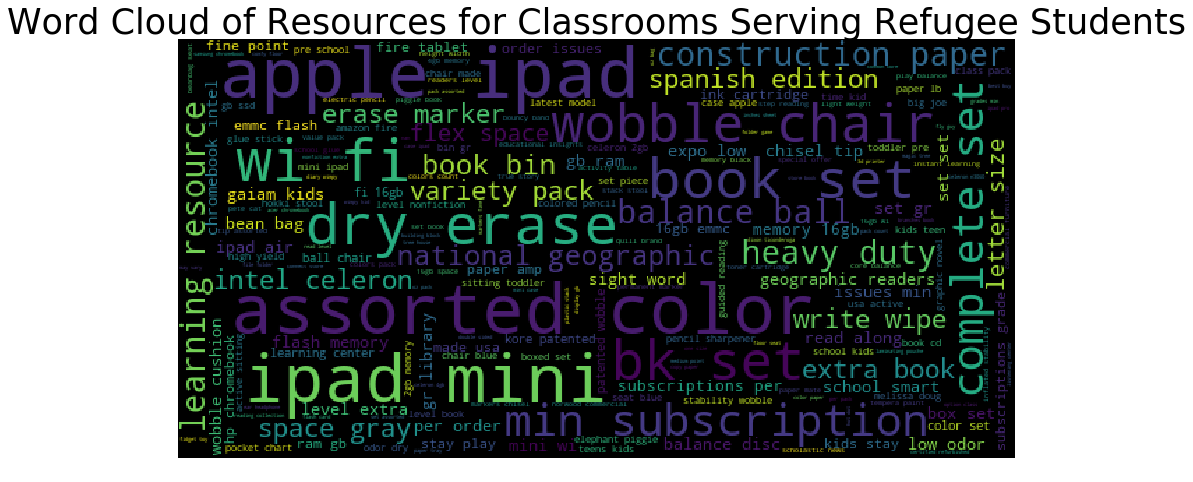

In [139]:
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(map(str, resources.values)))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Word Cloud of Resources for Classrooms Serving Refugee Students", fontsize=35)
plt.axis("off")
plt.show()

In [171]:
# We need to first identify resources using nltk, and then extract the most requested resources
# didn't end up needing the csv to make a corpora
f = open("resources_for_refugee_classrooms.csv")
raw_resources = f.read()

In [178]:
resources_list = resources.values.tolist()
temp_resources = ','.join(map(str, resources.values))
str_resources = temp_resources.split(",")
len(str_resources)

1191253

In [183]:
single_word_resources = [str(resource).split() for resource in resources_list]

In [184]:
#I think I need to convert my resources in essay type format into single word resources so that the bigram code below can work
list_of_single_word_resources = 
single_word_resources

[['my',
  'librarian',
  'is',
  'a',
  'camel',
  'how',
  'books',
  'are',
  'brought',
  'to',
  'children',
  'around',
  'the',
  'world'],
 ['jj386',
  'double',
  'sided',
  'learn',
  'to',
  'print',
  'write',
  'wipe',
  'board',
  'each'],
 ['just', 'dance', 'summer', 'party', 'nintendo', 'wii'],
 ['the', 'planets'],
 ['geography',
  'spin',
  'grades',
  '3',
  '6',
  '8',
  'issues',
  'min',
  '10',
  'subscriptions',
  'grades',
  '3',
  '6'],
 ['jumbo',
  'size',
  'wooden',
  'tetris',
  'game',
  'tangram',
  'new',
  'style',
  '13',
  'pcs',
  'brain',
  'teaser',
  'puzzle',
  'for',
  'kid',
  'toys',
  'educational'],
 ['how', 'to', 'babysit', 'a', 'grandma'],
 ['book', 'have', 'you', 'seen', 'my', 'cat', 'small', 'softcover'],
 ['kaplan', 'dough', 'counting', 'mats', 'set', 'of', '9'],
 ['10',
  'pack',
  '60mm',
  'rotary',
  'blades',
  'for',
  'olfa',
  'fiskars',
  'true',
  'cut',
  'brand',
  'cutters',
  'excellent',
  'quality',
  'with',
  'plastic',

In [179]:
# i think i need this in order to pull the most common phrases (since many resources are phrases?)

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = BigramCollocationFinder.from_words(
     str_resources)
finder.nbest(bigram_measures.pmi, 10)

[('00001 7150 blick tempera cakes leaf green',
  'the new world spanish english english spanish dictionary'),
 ('00001 8050 blick tempera cakes brown',
  'lego ninjago the vermillion attack 70621 building kit 83 piece'),
 ('00002 1129 sargent poster paints washable set set of 12 colors',
  'throwback traits american football posters vince lombardi inspirational motivational phrases great i'),
 ('00007 5006 crayola washable paint blue 16 oz bottle',
  'mantra lingua bilingual books arabic set of 5'),
 ('00007 8006 crayola washable paint brown 16 oz bottle',
  'naruto chapter book 15 the last chance'),
 ('00011 8046 blick premium grade tempera burnt sienna pint',
  'perler beads kit tray of 16 fun color perler fuse beads 4000 beads with four clear square pegboard s'),
 ('00012 3007 crayola premier tempera red 32 oz bottle',
  'eshopps aeo11000 overflow boxes pf 300 for aquarium tanks'),
 ('00012 5006 crayola premier tempera blue 16 oz bottle',
  'foam dot dice set of 2'),
 ('00018 3006 b

In [19]:
# source: https://www.kaggle.com/codename007/a-very-extensive-end-to-end-project-donorschoose/notebook, 5.3

nltk.download('stopwords')

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yejinkwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
projects_refugees_resource_count = projects_refugees_orig.loc[:, ["resource_category"]].apply(pd.value_counts)
projects_refugees_resource_count;

In [60]:
project_impact = projects_refugees_orig.dropna(subset=["project_impact_letter"]).loc[:, ["project_impact_letter", "project_hashed_id"]].drop_duplicates()
#unsure as to why there are duplicates but I'm just going to go ahead and drop them now to do my analysis
project_impact;

In [65]:
prepared_project_impact = project_impact["project_impact_letter"].map(text_prepare)

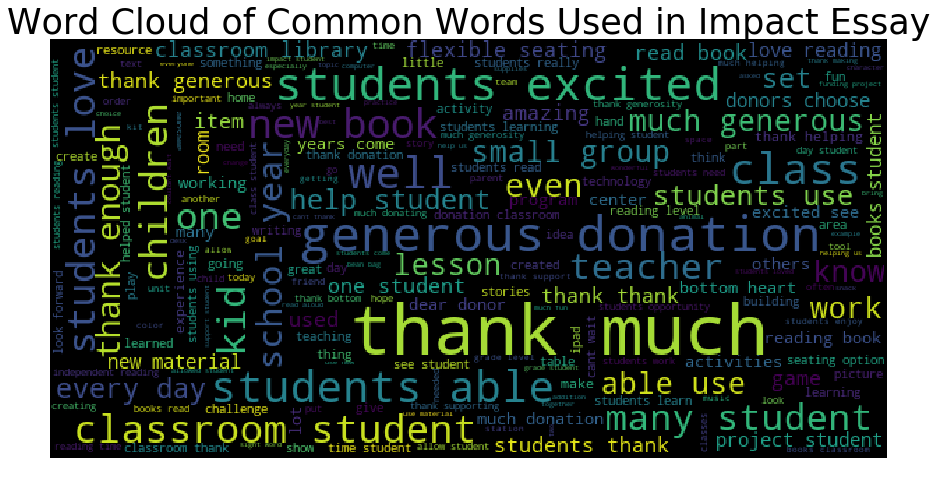

In [73]:
# look at the frequency of words in the impact statement using a word cloud to determine what kind of impact I want to look at
# source: https://www.kaggle.com/codename007/a-very-extensive-end-to-end-project-donorschoose/notebook, 5.4 
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(prepared_project_impact.values))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Word Cloud of Common Words Used in Impact Essay", fontsize=35)
plt.axis("off")
plt.show() 

#realized that it was difficult to measure what impact really meant, so identifying popular words in the impact essay isn't too useful

In [ ]:
# im